# Techniques of High Performance Computing: First Assignment
### Jan Zmazek, Scientific Computing
This Python package imports a triangular grid from a legacy vtk file, or creates a square grid with $m\cdot n$ nodes, and solves a diffusion equation
$$\begin{cases}
-\nabla\cdot\sigma(r)\nabla u(r)=f(r) & \text{in } \Omega\\
u(r)=0 &\text{on }\partial\Omega.
\end{cases}$$
using a finite element method. It consists of four modules
1. __Grid__ class is instantiated by Grid(vtk_file_name). It has consists methods:
    - __get_vertices_matrix()__ reads the vtk_file_name and returns vertices matrix,
    - __get_connectivity_matrix()__ reads the vtk file and returns connectivity matrix,
    - __export(solution)__ creates a vtk file with solution points as $z$-axis.
2.  __Fem__ class is instantiated by Fem(vertices_matrix, connectivity_matrix). It consists of 6 methods:
    - __solve(sigma, function, integration_order)__ is the main method of the Fem class that calls other methods to solve a diffusion equation with parameters sigma and function. It also solves a linear system of equations. integration_order parameter is passed to assembly method.
    - __assembly(element, sigma, function, integration_order)__ computes local stiffness matrix and local load vector for an element and assembles them to global stiffness matrix and global load vector.
    - __get_Jacobian(element)__ gets an element as the parameter and computes Jacobian matrix, used in assembly method.
    - __get_boundary_array()__ computes nodes that are on the edge of the graph based on Fem's object connectivity matrix.
    - __apply_boundary()__ applies boundary conditions to global stiffness matrix and global boundary vector.
    - __modify_solution()__ adds zeros to the solution's boundary nodes positions.
3. __Triangle__ module consists of four functions that are called when computing local stiffness matrix and load vector:
    - __get_shape_function(node)__ returns a shape funstion for node 1, 2 or 3 of the reference triangle.
    - __get_shape_function_derivative(node)__ returns a shape function derivative vector for node 1, 2 or 3 of the reference triangle.
    - __get_local_stiffness(inverse_transpose, determinant, sigma, integration_order)__ returns a local stiffness matrix based on the input parameters including Gaussian quadrature integration order.
    - __get_local_load(determinant, function, integration_order)__ returns a local load vector based on the input parameters including Gaussian quadrature integration order.
    

Most of the code is covered by unit tests.
I have implemented "plot" function in plot.py so that it automatically plots the solution. The wanted "solve" funtion is in solve.py file.

In [5]:
from solve import solve
def f(x, y): return y-x
def sigma(x, y): return y+x
solve("example.vtk", sigma, f, integration_order=3)

## Examples
The first example is simple with only 4 internal nodes:

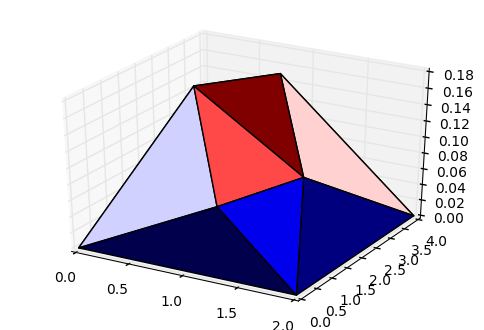

In [6]:
from plot import plot
plot("example.vtk", sigma, f)

Modifying functions $f$ and $\sigma$ gives very different result:

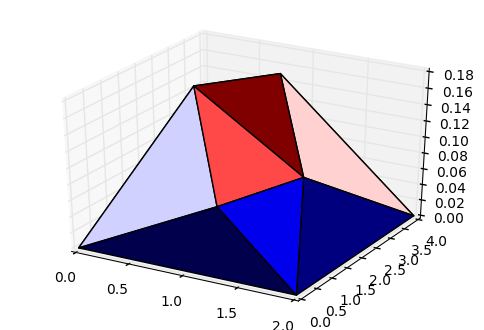

In [3]:
def f(x,y): return y-x
def sigma(x,y): return y+x
plot("example.vtk", sigma, f)

To easily generate examples, I additionally implemented a square_grid class which generates a square grid with number of points on x and y axis as arguments.

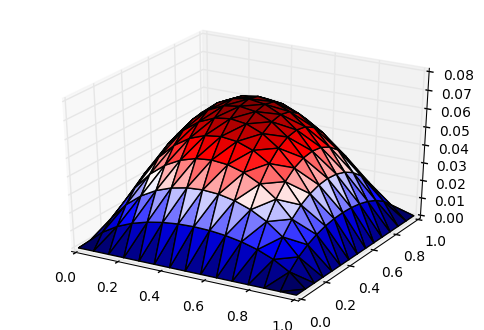

In [4]:
from plot import plot_square
def sigma(x, y): return 1
def f(x, y): return 1
plot_square(15, 15, sigma, f)

## Remarks
This package should work fine on any computer as it has very few external libraries (only numpy and scipy). If by any chance it doesn't work, there is a copy of this file on https://github.com/janzmazek/FEM/blob/master/solution.ipynb. Most of the code is covered by unittest, they can be run from the main folder by typing
```bash
python -m unittest
```
Pylint of the relevant files gives results:
- fem.py: 10/10
- triangle.py: 10/10
- grid.py: 10/10
- square.py: 10/10
- integration.py: 10/10